# Lesson 29 - Linear Regression

### The following topics are discussed in this notebook:
* Overview of linear regresion. 
* Building linear regression models in Scikit-Learn.

## Regression Tasks

Recall that in a regression task, we wish to create a model capable of estimating the value of a continuous, real-valued label (or response variable) $Y$. The model will use values of one or more features (or predictor variables) $X^{(1)}, X^{(2)}, ..., X^{(m)}$ as inputs. 

There are many different types of algorithms that you might consider creating for a given regression task. Some will work better on certain datasets than others. In this lesson, we will discuss the most basic type of regression algorithm, linear regression. 

## Linear Regression

A **linear regression** model uses the features $X^{(1)}, X^{(2)}, ..., X^{(m)}$ to generate predictions for the real-valued label $Y$ according to the following linear equation:

$$\large \hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X^{(1)} + \hat{\beta}_2 X^{(2)} + ... + \hat{\beta}_m X^{(m)}$$

The model parameters $\hat{\beta}_0, \hat{\beta}_1, \hat{\beta}_2, ..., \hat{\beta}_m$ are calculated by a learning algorithm to generate the model that provides the best fit for the given data. The learning algorithm measures the quality of the fit using the sum of squared errors loss function. 

## Sum of Squared Errors Loss

The **sum of squared errors (SSE)** loss is a common loss function used in regression problems. It provides a way of scoring the performance of a regression model on a particular dataset using the size of the errors in the estimates or predictions generated by that model on that dataset. We will now explain how this loss function is calculated. 

Let $y_1, y_2, y_3, ..., y_n$ represent several observed values for a real-valued label $Y$. Assume that $\hat y_1,\hat y_2, \hat y_3, ..., \hat y_n$ are corresponding estimates generated by some regression model. The sum of squared errors loss (SSE) for the model, as calculated on this data, is given by:

* $\large SSE = \sum \hat{e}_i^2$, where $\large\hat{e}_i = y_i - \hat{y}_i$

The formula for SSE can also be written as:

* $\large SSE = \sum \left( y_i - \hat{y}_i \right)^2$.

The goal of the learning algorithm in a linear regression problem is to find the values of $\hat{\beta}_0, \hat{\beta}_1, \hat{\beta}_2, ..., \hat{\beta}_m$ that result in a model with the smallest SSE.





## Linear Regression in Scikit-Learn

Linear regression models are created in Scikit-Learn as instances of the `LinearRegression` class, which is found in the `sklearn.linear_model` module. We will import that now, along with some other packages that we will need in this lesson.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

We will now look at some examples of creating linear regression models in Scikit-Learn. 

## Example 1: Synthetic Data with a Single Feature

As our first example, we will consider a regression problem with only one feature, $X$. A linear regression model with only one feature is called a **simple linear regression** model. 

In the cell below, we use NumPy to randomly generate a synthetic dataset consisting of a single predictor, and a continuous label. Notice that the data below was generated by selecting points on a line with an intercept of 5 and a slope of 1.4, and then adding some randomly generated, normally distributed "noise" to the y-values. 

In [2]:
np.random.seed(3)
n = 200
x = np.random.normal(loc=5, scale=1.8, size=n)
y = 5 + 1.4 * x + np.random.normal(loc=0, scale=1.5, size=n)

# The features need to be stored in a 2D array or DataFrame
X = x.reshape(n,1)

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (200, 1)
Shape of y: (200,)


We display a scatter plot of our synthetic dataset below. 

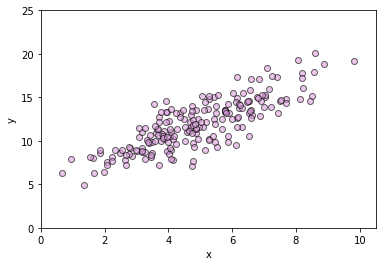

In [3]:
plt.figure(figsize=[6,4])
plt.scatter(x, y, alpha=0.6, color='plum', edgecolor='k')
plt.xlim([0,10.5])
plt.ylim([0,25])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We will now split the dataset into training and test sets, using an 80/20 split. We will not create a validation set in this instance, as we will not be comparing different models in this example. 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

The figure below displays scatter plots of the training and test sets. 

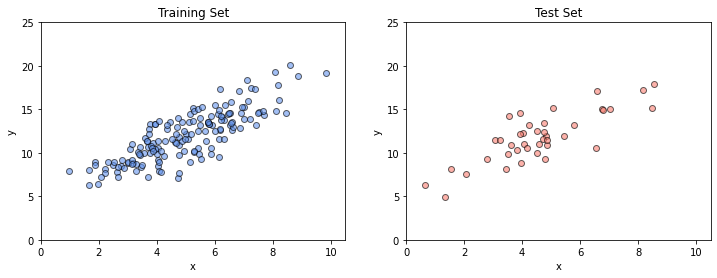

In [5]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(X_train, y_train, alpha=0.6, color='cornflowerblue', edgecolor='k')
plt.xlim([0,10.5])
plt.ylim([0,25])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Set')
plt.subplot(1,2,2)
plt.scatter(X_test, y_test, alpha=0.6, color='salmon', edgecolor='k')
plt.xlim([0,10.5])
plt.ylim([0,25])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test Set')
plt.show()

We will now use the `LinearRegression` class from Scikit-Learn to create the regression model. The trained model object will contain two new attributes: `intercept_` and `coef_`. The `intercept_` attribute contains the optimal value of $\hat\beta_0$ in the fitted model. The `coef_` attribute contains a list of values of the other $\hat\beta_i$ parameters. In this case, the list will contain only $\hat\beta_1$. 

In [6]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# We print the model parameters. 
print('Intercept:', model_1.intercept_)
print('Slope:    ', model_1.coef_)

Intercept: 4.9953665911282235
Slope:     [1.40125572]


From the output above, we see that the equation of our fitted linear regression model is:

$$\large\hat Y = 4.9954 + 1.4013 \cdot X $$

Notice that the values for the intercept and slope in our fitted model are very close to the associated values for the line that we used to generate the data. 

Each Scikit-Learn model object comes equipped with a `score()` method that can be used to measure the model's performance. For classification models, `score()` returns the model's accuracy on the provided dataset. For regression models, `score()` returns the model's **r-squared** score, as calculated on the provided dataset. The r-squared score is a number between 0 and 1 that can be interpretted as the proportion of the variance of the response variable $Y$ that has been explained by the model.  

We will will now use our linear regression model's `score()` method to calculate its r-squared score on the training and testing sets. 

In [7]:
train_r2 = model_1.score(X_train, y_train)
test_r2 = model_1.score(X_test, y_test)

print('Training r-Squared:', round(train_r2,4))
print('Testing r-Squared: ', round(test_r2,4))

Training r-Squared: 0.693
Testing r-Squared:  0.6518


We see that model performs a bit better on the training data than on the testing data. It is often the case that models will achieve better performance for the dataset on which they were trained than on new, previously unseen data. 

We will plot the dataset, along with the line that represents the regression model. 

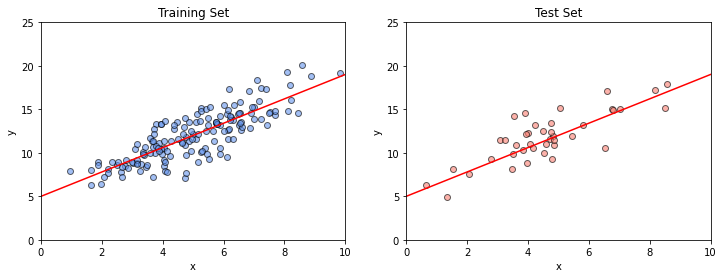

In [8]:
b = model_1.intercept_
m = model_1.coef_[0]

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(X_train, y_train, alpha=0.6, color='cornflowerblue', edgecolor='k')
plt.plot([0,10],[m*0 + b, m*10 + b], c='r')
plt.xlim([0,10])
plt.ylim([0,25])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Set')
plt.subplot(1,2,2)
plt.scatter(X_test, y_test, alpha=0.6, color='salmon', edgecolor='k')
plt.plot([0,10],[m*0 + b, m*10 + b], c='r')
plt.xlim([0,10])
plt.ylim([0,25])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test Set')
plt.show()


## Generating Predictions

Every Scikit-Learn model comes equipped with a `predict` method that can be used to generate predictions. We will use this method to find the `y` values that our model predicts for observations with `X=2`, `X=5`, and `X=8`. Note that the `predict()` method expects the new feature values to be provided as a two-dimensional dataset with each row referring to a single observation. 

In [9]:
Xnew = np.array([2, 5, 8]).reshape(3,1)
print(model_1.predict(Xnew))

[ 7.79787803 12.00164519 16.20541235]


## Example 2: Synthetic Data with Four Features

We will now consider a regression problem with four features. A linear regression model in which there is more than one feature is called a **multiple linear regression** model. We will see that very little in our workflow changes when we have more than one feature to work with. Once again, we will work with synthetic, randomly generated data.

In [10]:
np.random.seed(1)

n = 1000
x1 = np.round(np.random.normal(16, 3, n),2)
x2 = np.round(np.random.normal(50, 10, n),2)
x3 = np.round(np.random.normal(24, 6, n),2)
x4 = np.round(np.random.normal(150, 15, n),2)
y = np.round(37 + 3.2 * x1 + 1.5 * x2 - 2.1 * x3 + 0.3 * x4 + np.random.normal(0, 9, n),2)

df = pd.DataFrame({'X1':x1, 'X2':x2, 'X3':x3, 'X4':x4, 'Y':y})

df.head()

,X1,X2,X3,X4,Y
0,20.87,48.47,26.94,148.84,163.30
1,14.16,25.67,25.43,153.12,114.62
2,14.42,55.08,21.31,164.79,173.26
3,12.78,46.76,20.34,171.49,163.69
4,18.60,34.89,11.82,157.92,176.67


Since our dataset is store in a DataFrame, we will extract the feature array `X` and the label array `y`. 

In [11]:
X = df.iloc[:,:4].values
y = df.iloc[:,4].values

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (1000, 4)
Shape of y: (1000,)


We will split the dataset into training and test sets, using an 80/20 split. We will not create a validation set in this instance, as we will not be comparing different models in this example. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)

(800, 4)
(200, 4)


We can use the `LinearRegression` class from Scikit-Learn to create multiple regression models. The syntax is exactly the same as that used for our simple linear regression model. 

In [13]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

print('Model intercept:', model_2.intercept_)
print('Model coefficients:', model_2.coef_)

Model intercept: 39.311135372636244
Model coefficients: [ 3.14909439  1.50596374 -2.11353666  0.29399591]


From the output above, we see that the equation of our fitted linear regression model is:

$$\large\hat Y = 39.3111 + 3.1491 \cdot X^{(1)} + 1.5060 \cdot X^{(2)} - 2.1135 \cdot X^{(3)} + 0.2940 \cdot X^{(4)} $$

In the cell below, we calculate the model's training and testing r-squared scores. 

In [14]:
train_r2 = model_2.score(X_train, y_train)
test_r2 = model_2.score(X_test, y_test)

print('Training r-Squared:', round(train_r2,4))
print('Testing r-Squared: ', round(test_r2,4))

Training r-Squared: 0.8638
Testing r-Squared:  0.8618


We will now use our model to generate estimates $\hat y$ for new observations with the following feature values:

* $X^{(1)} = 20,~ X^{(2)} = 40,~ X^{(3)} = 22,~ X^{(4)} = 150$
* $X^{(1)} = 12,~ X^{(2)} = 50,~ X^{(3)} = 18,~ X^{(4)} = 120$
* $X^{(1)} = 15,~ X^{(2)} = 30,~ X^{(3)} = 24,~ X^{(4)} = 140$

In [15]:
Xnew = np.array([[20, 40, 22, 150], [12, 50, 18, 120], [15, 30, 24, 140]])
print(model_2.predict(Xnew))

[160.13315291 149.63430451 122.16101109]


## Example 3: Predicting Median Home Value

In this example, we will be working with the **Boston Housing** dataset. This dataset contains data for 506 census tracts of Boston from the 1970 census. 

The dataset contains the following 19 pieces of information for each census tract:
* **`town`** - name of town
* **`tract`** - census tract
* **`lon`** - longitude of census tract
* **`lat`** - latitude of census tract 
* **`medv`** - median value of owner-occupied homes in USD 1000's
* **`cmedv`** - corrected median value of owner-occupied homes in USD 1000's
* **`crim`** - per capita crime rate by town
* **`zn`** - proportion of residential land zoned for lots over 25,000 sq.ft
* **`indus`** - proportion of non-retail business acres per town
* **`chas`** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **`nox`** - nitric oxides concentration (parts per 10 million)
* **`rm`** - average number of rooms per dwelling
* **`age`** - proportion of owner-occupied units built prior to 1940
* **`dis`** - weighted distances to five Boston employment centres
* **`rad`** - index of accessibility to radial highways
* **`tax`** - full-value property-tax rate per USD 10,000
* **`ptratio`** - pupil-teacher ratio by town
* **`b`** - 1000(B - 0.63)^2 where B is the proportion of blacks by town
* **`lstat`** - percentage of lower status of the population

Our goal will be to create a regression model for the purpose of estimating values of `cmedv` use the columns that come after `cmedv` as features. 

We will start by importing the dataset from a text file, and then viewing the first 10 rows.

In [16]:
boston = pd.read_csv('data/BostonHousing.txt', sep='\t')
boston.head(n=10)

,town,tract,lon,lat,medv,cmedv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,Nahant,2011,-70.9550,42.2550,24.0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,2021,-70.9500,42.2875,21.6,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,2022,-70.9360,42.2830,34.7,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,2031,-70.9280,42.2930,33.4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,2032,-70.9220,42.2980,36.2,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,Marblehead,2033,-70.9165,42.3040,28.7,28.7,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,Salem,2041,-70.9360,42.2970,22.9,22.9,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,Salem,2042,-70.9375,42.3100,27.1,22.1,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,Salem,2043,-70.9330,42.3120,16.5,16.5,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,Salem,2044,-70.9290,42.3160,18.9,18.9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


Let's check the dimensions of the DataFrame.

In [17]:
print(boston.shape)

(506, 19)


As mentioned above, we will use `cmedv` as the label for our model, and will use the last 13 columns as features. We will now prepare our feature and label arrays. 

In [18]:
X = boston.iloc[:,6:].values
y = boston.iloc[:,5].values

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In order to measure how well our model generalizes to new data, we will split our data into training and test sets, using an 80/20 split. 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


We will now use the `LinearRegression` class to create our model. We will then display the parameters in the fitted model. 

In [20]:
model_3 = LinearRegression()
model_3.fit(X_train, y_train)

print(model_3.intercept_)
pd.Series(model_3.coef_, index=boston.columns[6:])

42.76113154507772


crim       -0.110315
zn          0.060000
indus       0.021576
chas        2.134697
nox       -19.522247
rm          3.075544
age         0.004304
dis        -1.536018
rad         0.303108
tax        -0.011639
ptratio    -0.950799
b           0.007200
lstat      -0.551868
dtype: float64

In the cell below, we calculate the model's training and testing r-squared scores. 

 We will use the `score` method of our trained model to calculate the r-Squared value on our training set, as well as on our test set. 

In [21]:
train_r2 = model_3.score(X_train, y_train)
test_r2 = model_3.score(X_test, y_test)

print("Training r-Squared:", round(train_r2,4))
print("Testing r-Squared: ", round(test_r2,4))

Training r-Squared: 0.7342
Testing r-Squared:  0.764
